In [ ]:
import sys

assert sys.version_info >= (3, 7)

SyntaxError: invalid syntax (<ipython-input-1-2fd83f8b08e8>, line 1)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 5장 서포트 벡터 머신
서포트 벡터 머신 (SVM)
- 선형, 비선형 분류, 회귀, 특이치 탐지 사용 가능
- 중소규모의 비선형 데이터셋에서 좋은 성능을 보임
- 분류 작업을 잘함
- 매우 큰 데이터셋에서는 확장이 잘 되지 않음


## 5.1 선형 SVM 분류

SVM 분류기는 클래스 사이에서 가장 폭이 넓은 도로(마진)를 찾는 방식으로 동작

➡ 라지 마진 분류기(Large Margin Classifier)

**마진(margin)**은 SVM에서 두 클래스 사이의 가장 가까운 데이터 포인트(서포트 벡터)와 결정 경계(초평면) 사이의 거리

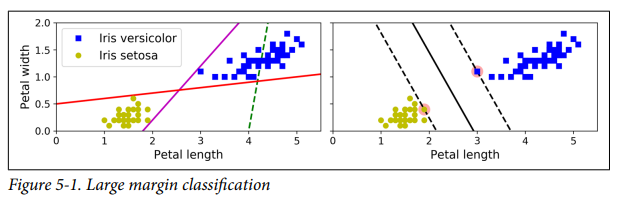

왼쪽 그래프
- 훈련 세트에 대해 완벽히 작동, 새로운 샘플에서는 잘 작동하지 않을듯

오른쪽 그래프
- 실선은 SVM 분류기의 결정 경계
- 제일 가까운 훈련 샘플로부터 가능한 멀리 떨어져 있음



## 5.1.1 소프트 마진 분류

도로의 폭을 가능한 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 잡아야 함

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42)) # dual 쌍대 문제 해결여부
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [ ]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

svm 모델은 각 샘플과 결정 경계 사이의 거리를 측정,
양수 or 음수

In [ ]:
svm_clf.decision_function(X_new) # 결정 함수
                                 # 결정 경계로부터 얼마나 떨어져 있는지 나타냄
                                 # 양수면 한 클래스에 속함, 음수면 다른 클래스에 속한다고 예측

array([ 0.66163411, -0.22036063])

## 5.2 비선형 SVM 분류

max_iter: 최적화 알고리즘이 업데이트를 시도하는 최대 반복 횟수

 epoch: 훈련 데이터 전체를 한 번 모두 사용하여 모델을 학습시키는 과정

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # make_moons는 초승달 모양 비선형 데이터셋 생성
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42) # max_iter=10_000 최대 반복 횟수
                                                                 # _(언더스코어) 큰 숫자 가독성 높이기 위함
)
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

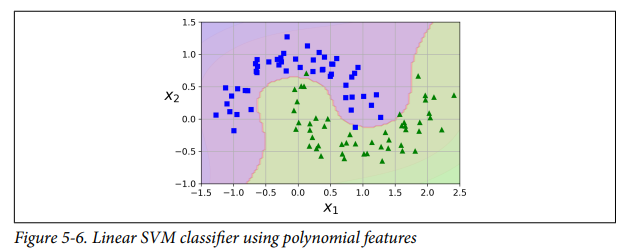

### 5.2.1 다항식 커널

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel='poly', degree=3, coef0=1, C=5)) # coef0=1 다항식의 상수항을 추가
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

coef0 값이 클수록⬆️: 고차원의 항이 덜 중요해지고, 모델이 선형적인 부분에 더 집중하게 됩니다.

coef0 값이 작을수록⬇️: 고차항의 영향이 커져, 더 비선형적인 결정 경계를 형성하게 됩니다.

### 5.2.3 가우스 RBF 커널

커널 트릭을 사용해 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 얻을 수 있음

감마: RBF 커널에서 데이터 포인트 간의 유사도를 계산하는 데 사용되는 하이퍼파라미터로, 커널 함수의 범위를 조절

- 감마 값이 크면

    각 데이터 포인트가 매우 좁은 범위에서만 영향을 미침

- 감마 값이 작으면

    데이터 포인트 간의 거리가 멀더라도 유사도가 크게 부여


---



C:오차를 얼마나 허용할지 결정, 마진의 폭과 오차 허용 간의 균형을 조절하는 역할

- C 값이 크면

    훈련 데이터에 더 잘 맞추는 쪽으로 작동

    더 복잡한 결정 경계 만들음

- C 값이 작으면

    오차를 더 많이 허용, 더 넓은 마진을 가지려는 쪽으로 작동

    결정 경계가 단순해짐, 일반화 성능 향상

In [ ]:
 rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="rbf", gamma=5, C=0.001))
 rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

## 5.3 SVM 회귀

도로 안에 최대한 많은 데이터 포인트를 포함하는 것이 목표

- 예측 값이 도로 안에 있으면 괜찮지만, 도로를 벗어난 데이터는 패널티를 받음
- 도로의 폭(ε)을 조절하여 모델의 복잡도와 오차 허용 범위를 조절할 수 있음

tol: 모델 학습의 수렴 조건을 설정하는 매개변수 (허용 오차)

epsilon: 예측 값과 실제 값 사이의 허용 오차 범위(도로의 폭)를 설정하는 매개변수

 ε가 작아지면 더 많은 데이터 포인트가 서포트 벡터가 되어 모델이 더 많은 데이터를 신경 쓰게 되며 예측 모델의 복잡성이 높아짐

In [ ]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50,1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

In [ ]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50,1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

## 5.4 SVM 이론

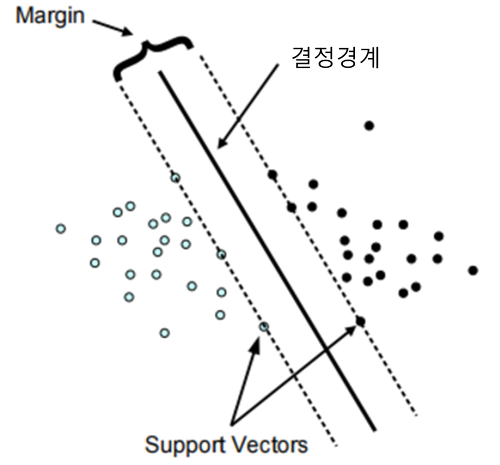

선형 SVM 분류기 모델은 결정함수를 계산해서 새로운 샘플의 x를 예측함

- X0은 편향 특성 항상 1
- 결괏값이 항상 0보다 크면 예측된 클래스 y는 양성 클래스 (1)이 됨, 그렇지 않으면 음성 클래스(0)
- f(x) = 0인 지점이 결정 경계


**결정함수의 수식**

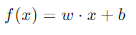
- w는 모델이 학습한 가중치 벡터(weight vector)
- x는 입력 데이터 특성 벡터(feature vector)
- b는 편향(bias) 또는 절편(intercept)
- ⋅는 내적(dot product) 연산

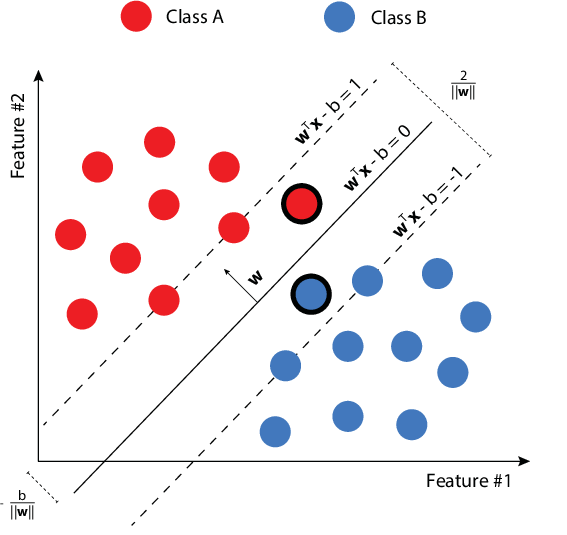

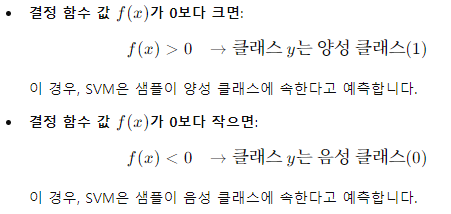

훈련

마진 오류 횟수를 제한하면서 도로(마진)를 가능한 넓게 만드는 가중치 벡터 w와 편향 b를 찾아야 함

🔎 여기서 "도로"는 두 클래스 사이의 결정 경계를 의미

마진이란 이 경계와 가장 가까운 데이터 포인트(서포트 벡터) 사이의 거리

도로의 너비를 더 넓히려면? w를 더 작게 만들어야 함

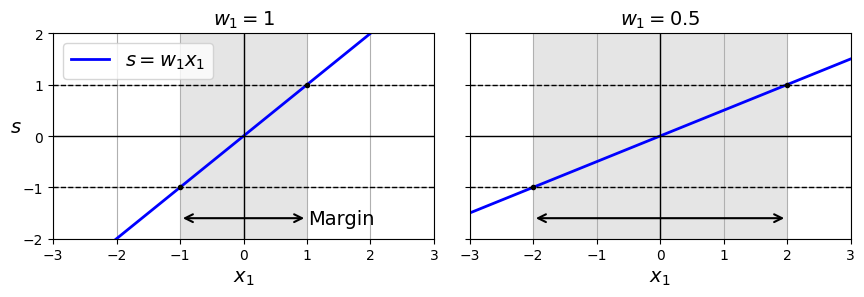

편향 b는 마진의 크기에 영향 미치지 않음

b는 결정 경계를 평행이동, 결정 경계의 방향이나 기울기를 변경하지 않고 위치만 이동시킴

### 5.4.2 소프트 마진

소프트 마진: SVM은 결정경계를 여전히 선형경계로 택하되, 마진의 폭 내부에 어느 정도 오차가 들어와도 용인해주도록 융통성을 부여해 일반화 성능의 향상을 기대할 수 있도록 함

핵심 아이디어는 각 훈련 데이터 샘플 (x
i
​
 ,y
i
​
 )마다 잉여 변수(slack variable) ξ
i
​
 를 대응시켜서 샘플이 마진의 폭 안으로 ξ
i
​
 만큼 파고드는 상황(심하게는 결정경계 건너편으로 넘어가 오답이 되는 상황)을 용인해줌

<img src="https://github.com/SHlee-TDA/ML_education/blob/main/SVM/soft_margin4.png?raw=true" width="400">

### 5.4.3 콰드라틱 프로그래밍

목적 함수가 이차 함수(Quadratic function)이고, 제약 조건이 선형 함수(Linear function)인 최적화 문제

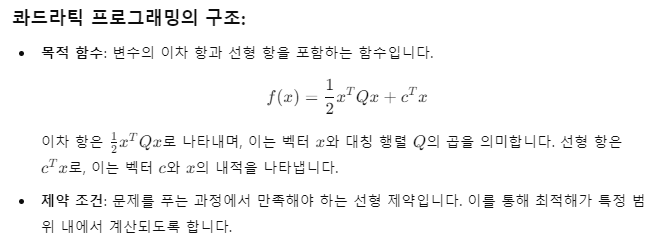

QP 솔버는 이차 목적 함수와 선형 제약 조건을 가진 콰드라틱 프로그래밍 문제를 해결하기 위한 알고리즘이나 소프트웨어

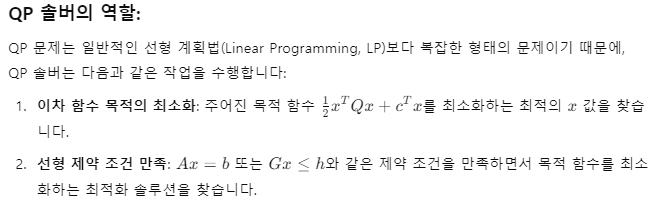

힌지 손실: SVM에서 마진 위반이 발생했을 때 패널티를 부여하는 손실 함수

이는 올바르게 분류된 데이터 포인트는 손실이 없고, 잘못 분류된 데이터는 마진 위반 정도에 비례하는 패널티를 받는 방식

제곱 힌지 손실:  힌지 손실을 제곱한 버전으로, 마진 위반이 클수록 더 큰 패널티를 부여하는 방식

이는 힌지 손실에 비해 더 매끄러운 경사를 제공

샘플이 결정 경계를 넘으면 손실이 발생

힌지 손실의 경우 선형적, 제곱 힌지 손실의 경우 이차방정식으로 증가

➡️ 제곱 힌지 손실이 이상치에 더 민감하게 반응

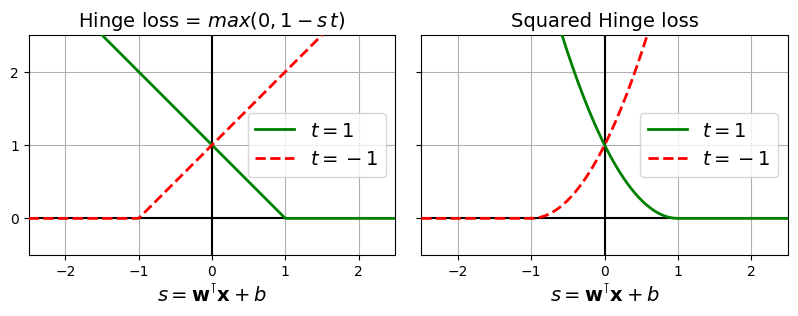

## 5.5 쌍대 문제

원래 문제를 직접 풀기보다는 쌍대 문제를 풀어 더 효율적으로 최적의 결정 경계를 찾음

커널 함수를 사용해 비선형 데이터에서 결정 경계를 찾는 과정에서 쌍대 문제는 매우 중요한 역할

### 5.5.1 커널 SVM

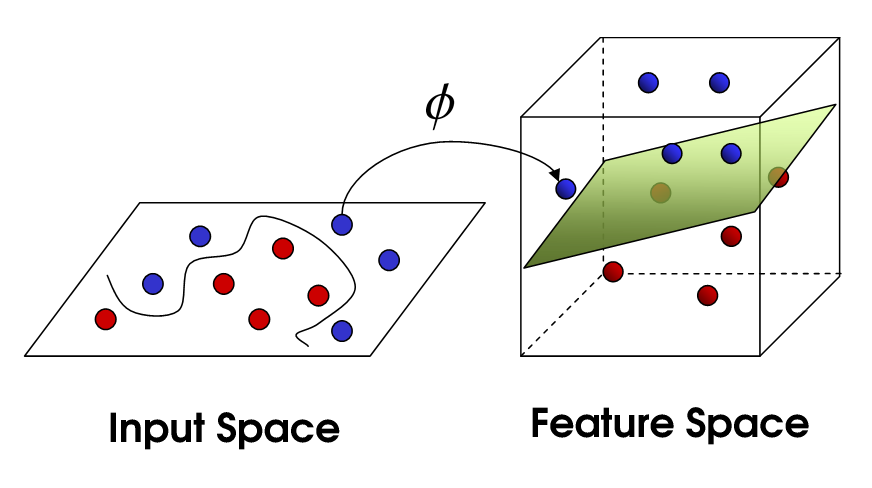

## 배치 경사 하강법으로 구현한 선형 SVM 분류기

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

**x 2 - 1**

만약 y가 0이었다면: 0 * 2 - 1 = -1이 됨

만약 y가 1이었다면: 1 * 2 - 1 = 1이 됨

따라서, 원래 y 값이 0일 경우 -1로, 1일 경우는 그대로 1로 변환

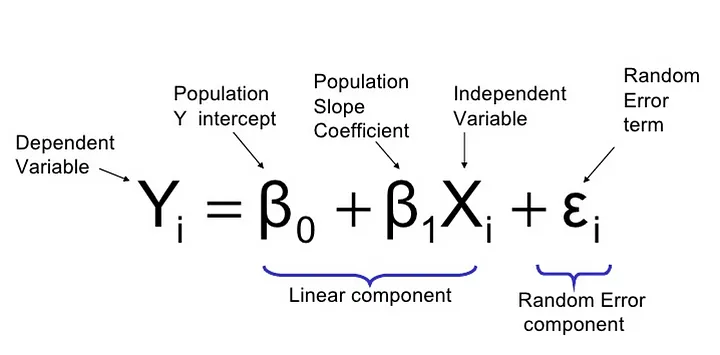

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C=C
        self.eta0 = eta0 # 학습률 초기 값
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d # 학습률 감쇠 파라미터

    def eta (self,epoch):
        return self.eta0 / (epoch + self.eta_d) # 학습률 반

    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # 가중치 무작위로 초기화
        b = 0 # 편향 항을 0으로 초기

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1 # y 값을 1 또는 -1로 변환
                                                                 # .reshape(-1, 1)
                                                                 # -1 -> 배열의 크기 자동 맞춤
                                                                 # 1 -> 열의 개수
        X_t = X * t # SVM의 목적 함수에서 마진을 계산하기 위해 곱함
        self.Js = []

        # 훈련
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel() # 해당하는 포인트들은 결정 경계에 가까움
                                                                   # 서포트 벡터로 적
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum()) # 비용 함수 계산
            self.Js.append(J)

            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum() # 편향에 대한 그라디언트가 손실 함수에서 음수 방향으로 계산됨

            w = w - self.eta(epoch) * w_gradient_vector # 그라디언트 업데이트
            b = b - self.eta(epoch) * b_derivative # 편향 학습률에 맞춰 그라디언트 사용해 업데이트

        self.intercept_ = np.array([b]) # 편향 저장, 항상 절편은 배열로 저장
        self.coef_ = np.array([w]) # 가중치 저장
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel() # 서포트 벡터 인덱스 계산
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0] # 1. X에 대해 가중치를 적용한 값(내적) 계산
                                                         # 2. 모델이 데이터를 분류할 때 결정 경계 조정 역할
    def predict(self, X):
        return self.decision_function(X) >= 0


In [ ]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, eta_d = 1000, n_epochs=60000,
                      random_state=2)

svm_clf.fit(X,y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[ True],
       [False]])

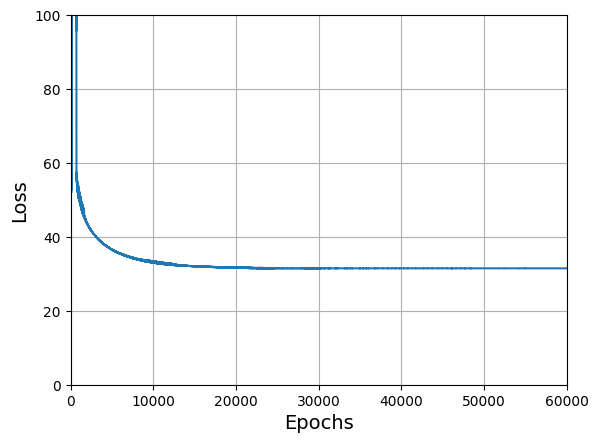

In [ ]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js) #  svm_clf.n_epochs 동안의 손실 함수 값(Js)을 그래프로
plt.axis([0, svm_clf.n_epochs, 0, 100]) # x축(에포크)의 범위를 [0, n_epochs]
                                        # y축(손실 값)의 범위를 [0, 100]으로 설정
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [ ]:
svm_clf2 = SVC(kernel="linear", C=C) # kernel="linear" 선형 결정 경계를 학습하는 방식
svm_clf2.fit(X,y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


<ipython-input-17-aa3a3b9c55d8>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm_clf2.fit(X,y.ravel())


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3,
                        random_state=42)
sgd_clf.fit(X,y)
print(sgd_clf.intercept_, sgd_clf.coef_)

[-12.52988101] [[1.94162342 1.84544824]]


## 연습문제

### 9번

문제: 선형적으로 분리되는 데이터셋에 `LinearSVC`를 훈련시켜보세요. 그런 다음 같은 데이터셋에 `SVC`와 `SGDClassifier`를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1) # 0이거나 1인 요소들에 대해 True 값 반환
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True,random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

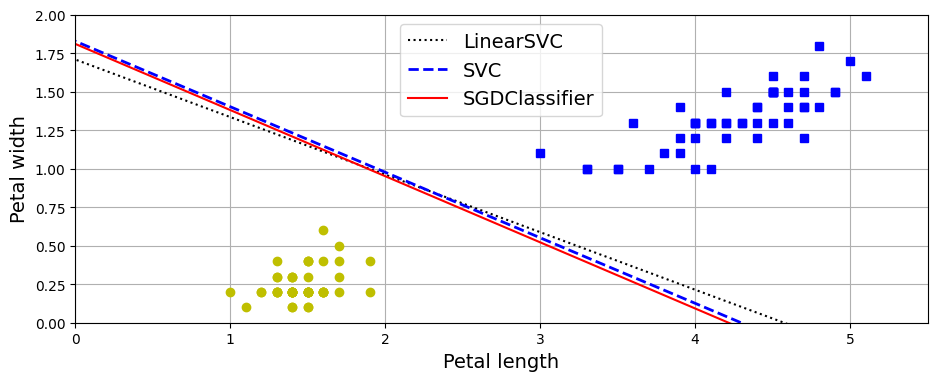

In [ ]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

### 10번

문제: `sklearn.datasets.load_wine()`을 사용해 로드할 수 있는 와인 데이터셋에서 SVM 분류기를 훈련하세요. 이 데이터셋에는 세 명의 다른 재배자에서 생산된 178개의 와인 샘플에 대한 화학 성분이 포함되어 있습니다. 목표는 와인의 화학 성분을 기반으로 재배자를 예측할 수 있는 분류 모델을 훈련하는 것입니다. SVM 분류기는 이진 분류기이므로 세 가지 클래스를 모두 분류하려면 OvA를 사용해야 합니다. 어느 정도의 정확도에 도달할 수 있나요?

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [ ]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [ ]:
y_train.head()

,target
2,0
100,1
122,1
154,2
51,0


수렴 실패 이유

- 데이터 스케일링 문제 ✔️이거일듯
- 학습 반복 횟수 부족
- 모델이 너무 복잡하거나 데이터가 잘못된 경우
- 데이터셋의 크기나 특성의 고차원성

In [ ]:
lin_clf = LinearSVC(dual=True, random_state=42) # 수렴 실패
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, random_state=42)

In [ ]:
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42) # 수렴 실패
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, max_iter=1000000, random_state=42)

5번의 경고와 함께 모델의 평균 교차 검증 정확도 출력

5번의 교차 검증을 통해 얻은 모델의 평균 정확도가 약 91%

수렴 경고에도 불구하고 모델의 성능(정확도)은 여전히 나쁘지 않음


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.90997150997151

In [ ]:
C = 5
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(max_iter=2000000,loss="hinge", C=C, dual=True, tol=1e-4, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=5, dual=True, loss='hinge', max_iter=2000000,
                           random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train, cv=5).mean()

0.9774928774928775

In [ ]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

# 파라미터 분포 설정
param_distrib = {
    "svc__gamma" : loguniform(0.001, 0.1), # gamma는 결정 경계의 곡률을 제어하는 역할
                                           # loguniform(로그 균등 분포)
    "svc__C" : uniform(1, 10)  # C는 규제 강도를 제어하는 하이퍼파라미터, 과적합과 과소적합 간의 균형을 조정
                               # uniform 분포는 지정된 범위 내에서 모든 값이 동일한 확률로 선택
}

# RandomizedSearchCV를 사용하여 최적 하이퍼파라미터 탐색
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)

rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

In [ ]:
rnd_search_cv.best_score_ #최적 모델의 교차 검증 평균 점수

0.9925925925925926

이렇게 튜닝된 커널 SVM은 `LinearSVC` 모델보다 더 나은 성능을 보이지만 교차 검증을 사용하여 측정한 것보다 테스트 세트에서 더 낮은 점수


하이퍼파라미터 튜닝을 너무 많이 수행했기 때문에 교차 검증 테스트 세트에 **약간 과대적합**



In [ ]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

### 11번

문제: 캘리포니아 주택 데이터셋에서 SVM 회귀 모델을 훈련하고 미세 튜닝하세요. 2장에서 수정한 버전이 아닌 `sklearn.datasets.fetch_california_housing()`으로 로드한 원본 데이터셋을 사용할 수 있습니다. 타깃 값은 십만 달러 단위입니다. 샘플이 20,000개가 넘기 때문에 SVM이 느려질 수 있습니다. 따라서 하이퍼파라미터 튜닝을 할 때 훨씬 적은 샘플(예를 들어 2,000개)를 사용하여 더 많은 하이퍼파라미터 조합을 테스트해야 합니다. 가장 좋은 모델의 RMSE는 얼마인가요?

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [ ]:
lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=5000, random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_svr, X_train, y_train).mean()

-0.43723200283658653

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [ ]:
np.sqrt(mse)

0.979565447829459

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma" : loguniform(0.001, 0.1),
    "svr__C" : uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9edcecb250>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9edceca7d0>},
                   random_state=42)

In [ ]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [ ]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5854732265172238